In [76]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [77]:
#cargar archivo desde seaborn 
df=pd.read_csv('Victoria_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/19898,Duchess Suite,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/101822/ae950f...,Ryan,2010-01-11,Desconocido,-%,f,...,5.00,5.00,5.00,4.90,4.80,1.0,0.0,0.0,0.0,1.90
1,https://www.airbnb.com/rooms/83515,GALLERY B&B SUITE,A quiet and sunny suite with a private entranc...,"Our property has gardens, an orchard, a pond a...",https://a0.muscache.com/pictures/6110737/930db...,Celia,2011-03-21,within an hour,100%,t,...,4.87,4.92,4.84,4.94,4.75,2.0,2.0,0.0,0.0,0.90
2,https://www.airbnb.com/rooms/168460,Perfectly located lovely home,"Wonderful neighborhood, two blocks to inner ha...",Lovely neighborhood with friendly neighbors su...,https://a0.muscache.com/pictures/7a2bfc51-fd59...,Deborah,2011-07-10,Desconocido,-%,f,...,4.98,4.89,4.92,5.00,4.90,1.0,1.0,0.0,0.0,0.43
3,https://www.airbnb.com/rooms/185732,Romantic 2 bedroom private suite,The unit is a 2 bedroom suite sectioned off fr...,No se proporcionan detalles,https://a0.muscache.com/pictures/20829630/9356...,Peter,2011-07-27,a few days or more,10%,f,...,4.65,4.82,4.88,4.90,4.61,3.0,0.0,0.0,0.0,0.32
4,https://www.airbnb.com/rooms/193366,Tudor Cottage,"In the historic Rockland area of Victoria, thi...",We are surrounded by heritage homes with lovel...,https://a0.muscache.com/pictures/6145514/1eb8d...,Sandra,2011-08-07,within a few hours,75%,f,...,4.78,4.92,4.89,4.88,4.76,1.0,1.0,0.0,0.0,1.01


In [78]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,-%,f,f,Private room in rental unit,Private room,f,1.0,1.0,188.5,5.00
1,100%,t,t,Entire guest suite,Entire home/apt,t,2.0,1.0,175.0,4.87
2,-%,f,f,Entire townhouse,Entire home/apt,f,3.0,1.0,200.0,4.98
3,10%,f,t,Private room in home,Private room,f,5.0,1.0,199.0,4.65
4,75%,f,t,Entire guest suite,Entire home/apt,t,6.0,1.0,135.0,4.78
...,...,...,...,...,...,...,...,...,...,...
3962,100%,f,t,Entire rental unit,Entire home/apt,t,4.0,1.0,178.0,5.00
3963,-%,f,t,Entire home,Entire home/apt,f,4.0,1.0,242.0,5.00
3964,-%,f,f,Entire guesthouse,Entire home/apt,f,4.0,1.0,155.5,5.00
3965,-%,f,t,Entire home,Entire home/apt,f,4.0,1.0,242.0,5.00


In [ ]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#f1['property_type'] = encoder.fit_transform(f1['property_type'])
#f1['property_type'] = f1['property_type'].astype(float)

frecuencias = f1['property_type'].value_counts()
f1['property_type'] = f1['property_type'].map(frecuencias)


f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\josse\AppData\Local\Temp\ipykernel_6752\768419520.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_6752\768419520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_6752\768419520.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

In [80]:
#f2 = Hotel room
f2= f1[(f1["room_type"] == 3)]

In [81]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 726 to 3862
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         13 non-null     float64
 1   host_is_superhost          13 non-null     int64  
 2   host_identity_verified     13 non-null     int64  
 3   property_type              13 non-null     int64  
 4   room_type                  13 non-null     int64  
 5   instant_bookable           13 non-null     int64  
 6   accommodates               13 non-null     float64
 7   bathrooms                  13 non-null     float64
 8   price                      13 non-null     float64
 9   review_scores_cleanliness  13 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 1.1 KB


<Axes: xlabel='room_type', ylabel='price'>

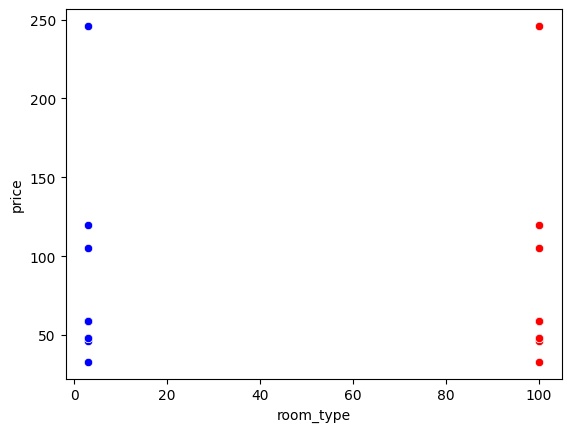

In [82]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
#para observar el comportamiento en su dispersión 

from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

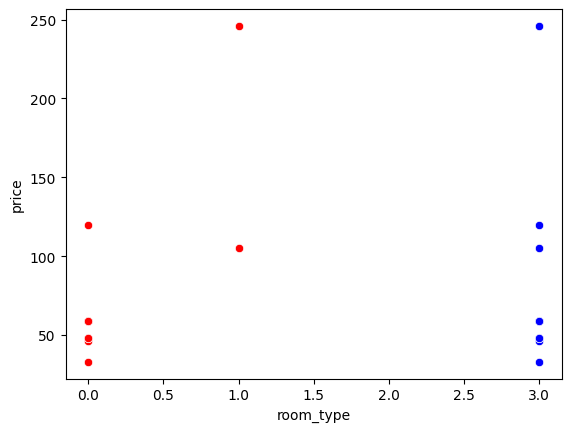

In [83]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

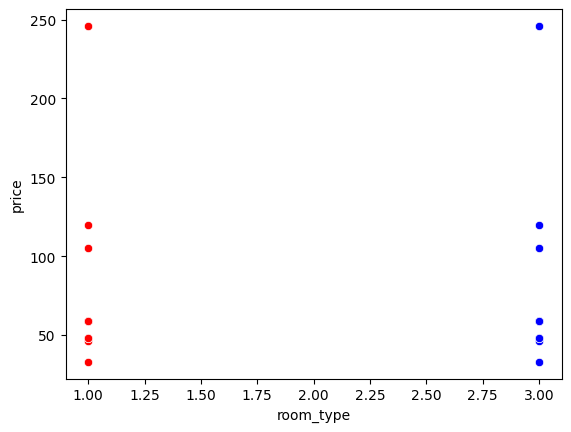

In [84]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

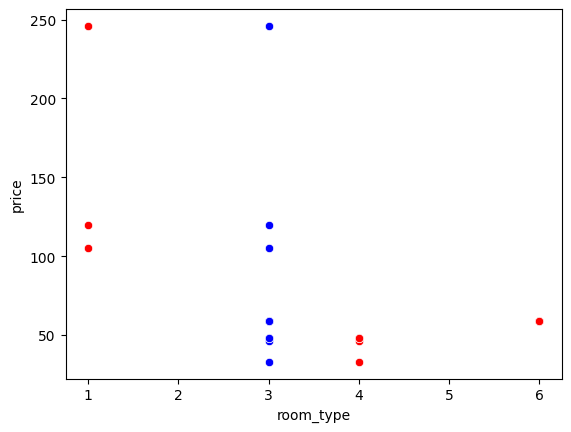

In [85]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

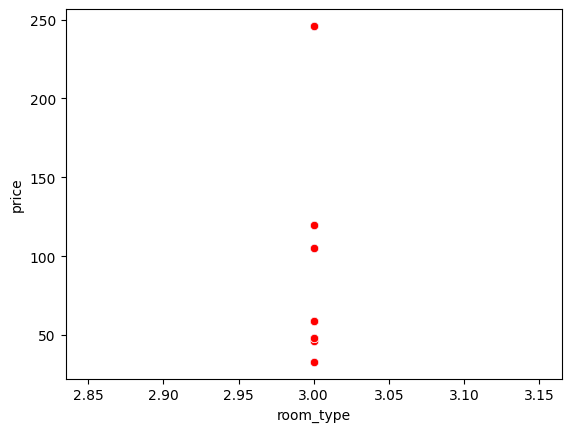

In [86]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

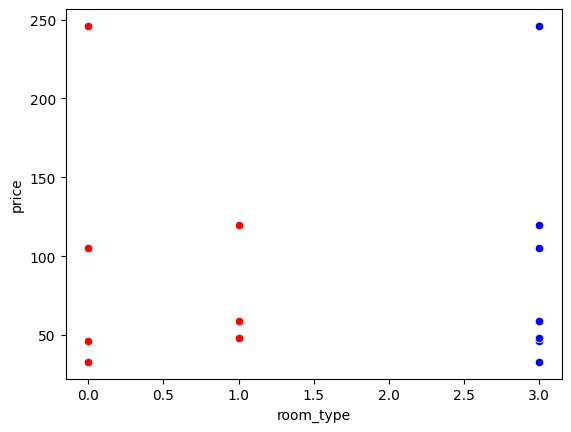

In [87]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

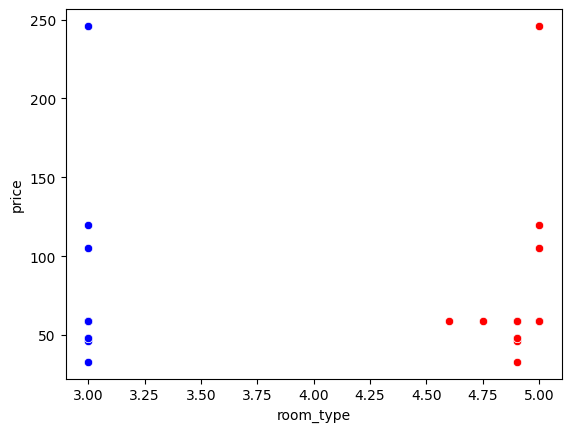

In [88]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

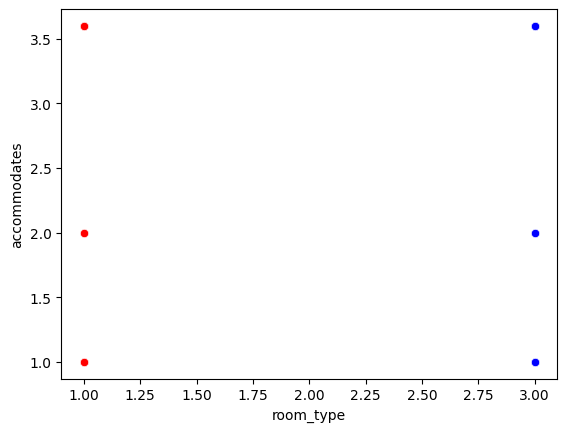

In [89]:
from turtle import color 

sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=f2)

**DECLARACIÓN DE VARIABLES INDEPENDIENTES Y DEPENDIENTES**

In [90]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep= f2[['host_response_rate']]
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]
#declaración de variable independiente para accommodates 
Var_Indep8= f2[['bathrooms']]

In [91]:
#variables independientes para la regresión lineal
Var_Dep= f2['price']
Var_Dep2= f2['accommodates']

**DEFINICIÓN DEL MODELO**

In [92]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [93]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [94]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

**COEFICIENTES OBTENIDOS PARA NUESTROS MODELOS**

In [95]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(76.92307692307692)}

In [96]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([116.5]),
 'rank_': 1,
 'singular_': array([1.30088727]),
 'intercept_': np.float64(59.0)}

In [97]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(76.92307692307692)}

In [98]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(76.92307692307692)}

In [99]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-18.60091743]),
 'rank_': 1,
 'singular_': array([7.09279157]),
 'intercept_': np.float64(155.61926605504587)}

In [100]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-44.16666667]),
 'rank_': 1,
 'singular_': array([1.66410059]),
 'intercept_': np.float64(107.5)}

In [101]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([175.61611374]),
 'rank_': 1,
 'singular_': array([0.40287429]),
 'intercept_': np.float64(-784.2713270142158)}

In [102]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(2.3538461538461544)}

**A PARTIR DE AQUÍ PREDECIMOS VALORES DE ACUERDO AL MODELO MATEMÁTICO**

**Modelo matemático y=-0.94114872x + 1327.7330443080114**

In [103]:
#predecimos valores
y_pred= model.predict(X=f2[['host_response_rate']])
y_pred

array([76.92307692, 76.92307692, 76.92307692, 76.92307692, 76.92307692,
       76.92307692, 76.92307692, 76.92307692, 76.92307692, 76.92307692,
       76.92307692, 76.92307692, 76.92307692])

**Modelo matemático y=21.00986237x + 1237.7516553524084**

In [104]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([ 59. ,  59. ,  59. ,  59. , 175.5,  59. ,  59. ,  59. ,  59. ,
        59. ,  59. , 175.5,  59. ])

**Modelo matemático y=0x + 11247.1754189944133**

In [105]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([76.92307692, 76.92307692, 76.92307692, 76.92307692, 76.92307692,
       76.92307692, 76.92307692, 76.92307692, 76.92307692, 76.92307692,
       76.92307692, 76.92307692, 76.92307692])

**Modelo matemático y=-112.80942578x + 1357.171593533486**

In [106]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([76.92307692, 76.92307692, 76.92307692, 76.92307692, 76.92307692,
       76.92307692, 76.92307692, 76.92307692, 76.92307692, 76.92307692,
       76.92307692, 76.92307692, 76.92307692])

**Modelo matemático y=-4.56100445x + 1325.0492572068565**

In [107]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([ 81.21559633,  81.21559633,  81.21559633,  81.21559633,
       137.01834862,  44.01376147,  44.01376147,  44.01376147,
        44.01376147,  44.01376147,  44.01376147, 137.01834862,
       137.01834862])

**Modelo matemático y=71.48464608x + 1217.0755372065255**

In [108]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([107.5       ,  63.33333333,  63.33333333, 107.5       ,
       107.5       ,  63.33333333,  63.33333333,  63.33333333,
        63.33333333,  63.33333333,  63.33333333, 107.5       ,
        63.33333333])

**Modelo matemático y=381.28956491x + -604.4218714343112**

In [109]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([76.24763033, 76.24763033, 76.24763033, 76.24763033, 93.80924171,
       93.80924171, 76.24763033, 76.24763033, 93.80924171, 49.90521327,
       23.56279621, 93.80924171, 93.80924171])

**Modelo matemático y=0.97488088x + 2.1063441944025767**

In [110]:
y_pred8= model8.predict(X=f2[['bathrooms']])
y_pred8

array([2.35384615, 2.35384615, 2.35384615, 2.35384615, 2.35384615,
       2.35384615, 2.35384615, 2.35384615, 2.35384615, 2.35384615,
       2.35384615, 2.35384615, 2.35384615])

**INSERTAMOS LA COLUMNA DE PREDICCIONES A NUESTRO DATAFRAME**

In [111]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Prediccion_host_response_rate', y_pred)
f2

,Prediccion_host_response_rate,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
726,76.923077,100.0,0,1,4,3,0,1.0,1.0,46.0,4.90
1239,76.923077,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1240,76.923077,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1529,76.923077,100.0,0,1,4,3,0,1.0,1.0,33.0,4.90
2189,76.923077,100.0,1,1,1,3,0,2.0,1.0,105.0,5.00
3286,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3287,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3288,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3289,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3290,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,4.75


In [112]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Prediccion_host_is_superhost', y_pred2)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
726,76.923077,59.0,100.0,0,1,4,3,0,1.0,1.0,46.0,4.90
1239,76.923077,59.0,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1240,76.923077,59.0,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1529,76.923077,59.0,100.0,0,1,4,3,0,1.0,1.0,33.0,4.90
2189,76.923077,175.5,100.0,1,1,1,3,0,2.0,1.0,105.0,5.00
3286,76.923077,59.0,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3287,76.923077,59.0,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3288,76.923077,59.0,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3289,76.923077,59.0,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3290,76.923077,59.0,100.0,0,1,6,3,1,3.6,1.0,59.0,4.75


In [113]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Prediccion_room_type', y_pred3)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
726,76.923077,59.0,76.923077,100.0,0,1,4,3,0,1.0,1.0,46.0,4.90
1239,76.923077,59.0,76.923077,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1240,76.923077,59.0,76.923077,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1529,76.923077,59.0,76.923077,100.0,0,1,4,3,0,1.0,1.0,33.0,4.90
2189,76.923077,175.5,76.923077,100.0,1,1,1,3,0,2.0,1.0,105.0,5.00
3286,76.923077,59.0,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3287,76.923077,59.0,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3288,76.923077,59.0,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3289,76.923077,59.0,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3290,76.923077,59.0,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,4.75


In [114]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Prediccion_host_identity_verified', y_pred4)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
726,76.923077,59.0,76.923077,76.923077,100.0,0,1,4,3,0,1.0,1.0,46.0,4.90
1239,76.923077,59.0,76.923077,76.923077,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1240,76.923077,59.0,76.923077,76.923077,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1529,76.923077,59.0,76.923077,76.923077,100.0,0,1,4,3,0,1.0,1.0,33.0,4.90
2189,76.923077,175.5,76.923077,76.923077,100.0,1,1,1,3,0,2.0,1.0,105.0,5.00
3286,76.923077,59.0,76.923077,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3287,76.923077,59.0,76.923077,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3288,76.923077,59.0,76.923077,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3289,76.923077,59.0,76.923077,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3290,76.923077,59.0,76.923077,76.923077,100.0,0,1,6,3,1,3.6,1.0,59.0,4.75


In [115]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Prediccion_property_type', y_pred5)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
726,76.923077,59.0,76.923077,76.923077,81.215596,100.0,0,1,4,3,0,1.0,1.0,46.0,4.90
1239,76.923077,59.0,76.923077,76.923077,81.215596,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1240,76.923077,59.0,76.923077,76.923077,81.215596,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1529,76.923077,59.0,76.923077,76.923077,81.215596,100.0,0,1,4,3,0,1.0,1.0,33.0,4.90
2189,76.923077,175.5,76.923077,76.923077,137.018349,100.0,1,1,1,3,0,2.0,1.0,105.0,5.00
3286,76.923077,59.0,76.923077,76.923077,44.013761,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3287,76.923077,59.0,76.923077,76.923077,44.013761,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3288,76.923077,59.0,76.923077,76.923077,44.013761,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3289,76.923077,59.0,76.923077,76.923077,44.013761,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3290,76.923077,59.0,76.923077,76.923077,44.013761,100.0,0,1,6,3,1,3.6,1.0,59.0,4.75


In [116]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Prediccion_instant_bookable', y_pred6)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
726,76.923077,59.0,76.923077,76.923077,81.215596,107.500000,100.0,0,1,4,3,0,1.0,1.0,46.0,4.90
1239,76.923077,59.0,76.923077,76.923077,81.215596,63.333333,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1240,76.923077,59.0,76.923077,76.923077,81.215596,63.333333,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1529,76.923077,59.0,76.923077,76.923077,81.215596,107.500000,100.0,0,1,4,3,0,1.0,1.0,33.0,4.90
2189,76.923077,175.5,76.923077,76.923077,137.018349,107.500000,100.0,1,1,1,3,0,2.0,1.0,105.0,5.00
3286,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3287,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3288,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3289,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3290,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,100.0,0,1,6,3,1,3.6,1.0,59.0,4.75


In [117]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Prediccion_review_scores_cleanliness', y_pred7)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
726,76.923077,59.0,76.923077,76.923077,81.215596,107.500000,76.247630,100.0,0,1,4,3,0,1.0,1.0,46.0,4.90
1239,76.923077,59.0,76.923077,76.923077,81.215596,63.333333,76.247630,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1240,76.923077,59.0,76.923077,76.923077,81.215596,63.333333,76.247630,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1529,76.923077,59.0,76.923077,76.923077,81.215596,107.500000,76.247630,100.0,0,1,4,3,0,1.0,1.0,33.0,4.90
2189,76.923077,175.5,76.923077,76.923077,137.018349,107.500000,93.809242,100.0,1,1,1,3,0,2.0,1.0,105.0,5.00
3286,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,93.809242,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3287,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,76.247630,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3288,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,76.247630,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3289,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,93.809242,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3290,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,49.905213,100.0,0,1,6,3,1,3.6,1.0,59.0,4.75


In [118]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Prediccion_bathrooms', y_pred8)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
726,76.923077,59.0,76.923077,76.923077,81.215596,107.500000,76.247630,2.353846,100.0,0,1,4,3,0,1.0,1.0,46.0,4.90
1239,76.923077,59.0,76.923077,76.923077,81.215596,63.333333,76.247630,2.353846,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1240,76.923077,59.0,76.923077,76.923077,81.215596,63.333333,76.247630,2.353846,100.0,0,1,4,3,1,1.0,1.0,48.0,4.90
1529,76.923077,59.0,76.923077,76.923077,81.215596,107.500000,76.247630,2.353846,100.0,0,1,4,3,0,1.0,1.0,33.0,4.90
2189,76.923077,175.5,76.923077,76.923077,137.018349,107.500000,93.809242,2.353846,100.0,1,1,1,3,0,2.0,1.0,105.0,5.00
3286,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,93.809242,2.353846,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3287,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,76.247630,2.353846,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3288,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,76.247630,2.353846,100.0,0,1,6,3,1,3.6,1.0,59.0,4.90
3289,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,93.809242,2.353846,100.0,0,1,6,3,1,3.6,1.0,59.0,5.00
3290,76.923077,59.0,76.923077,76.923077,44.013761,63.333333,49.905213,2.353846,100.0,0,1,6,3,1,3.6,1.0,59.0,4.75


**GRÁFICAS COMPARATIVAS**

<Axes: xlabel='host_response_rate', ylabel='price'>

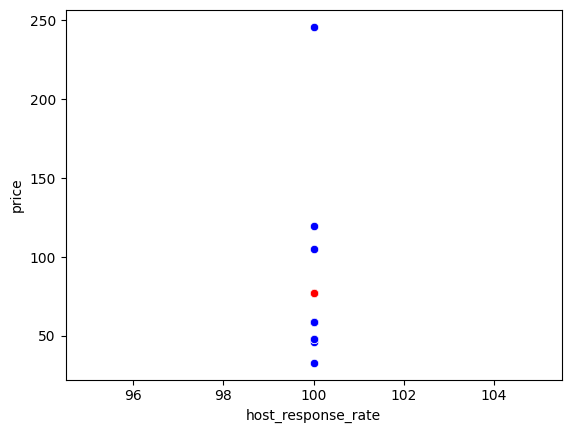

In [119]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_response_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='Prediccion_host_response_rate', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

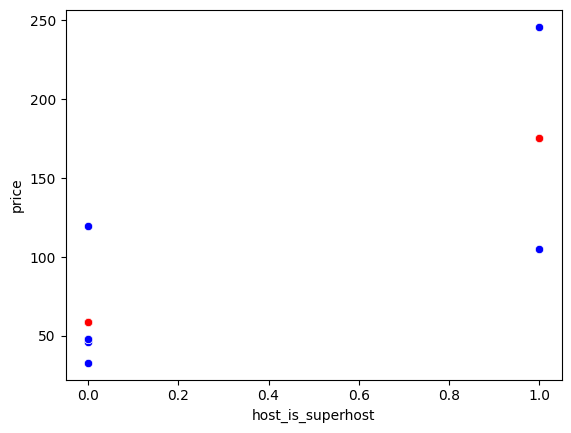

In [120]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Prediccion_host_is_superhost', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

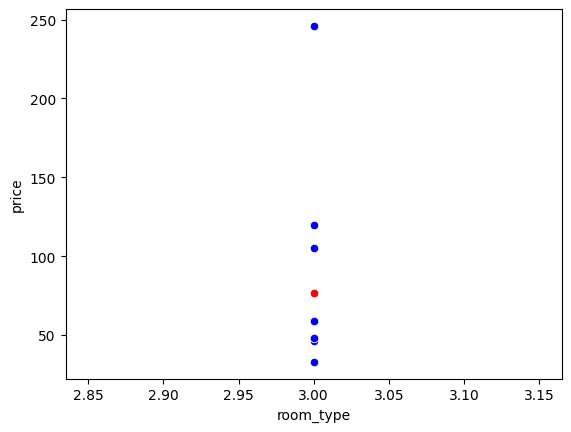

In [121]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Prediccion_room_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

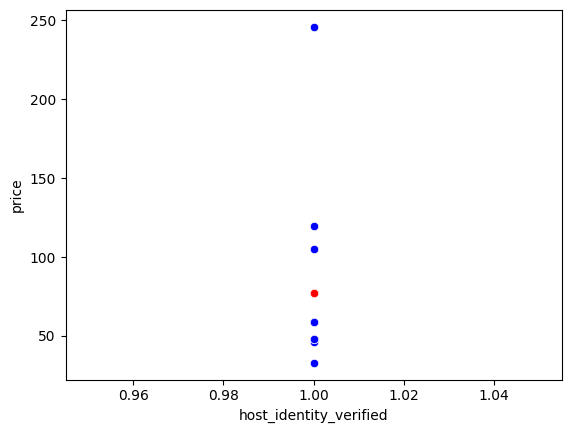

In [122]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Prediccion_host_identity_verified', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

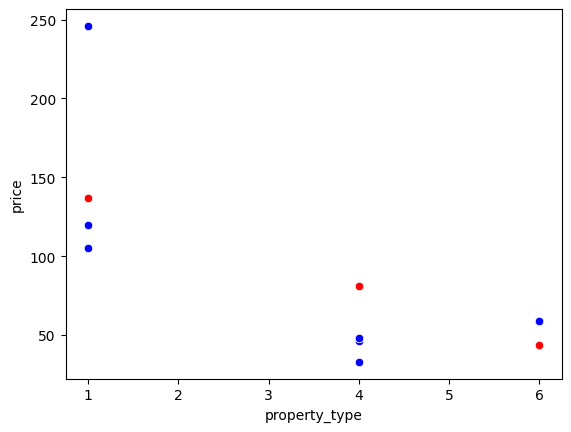

In [123]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Prediccion_property_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

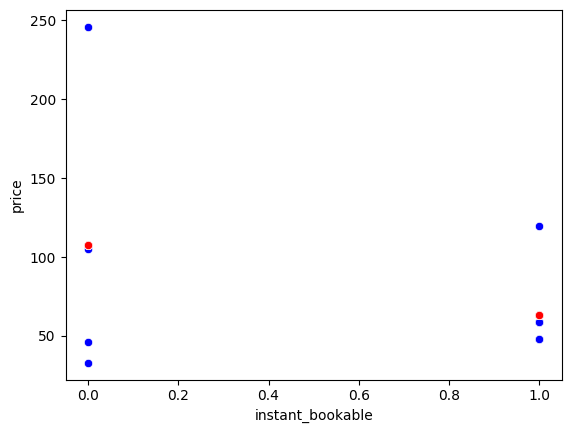

In [124]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Prediccion_instant_bookable', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

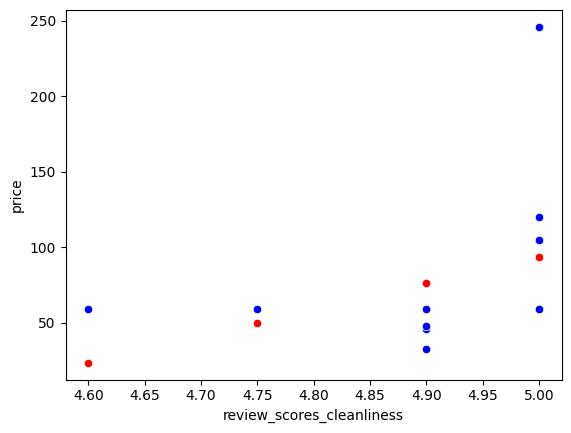

In [125]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion_review_scores_cleanliness', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

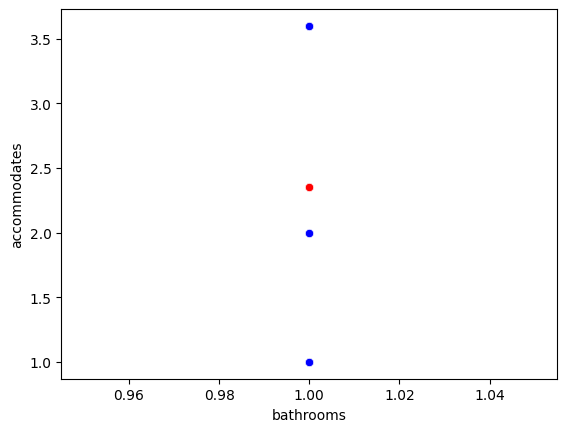

In [126]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='Prediccion_bathrooms', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**COEFICIENTES DE DETERMINACIÓN**

In [127]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.0

In [128]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.608968632729646

In [129]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [130]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.0

In [131]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.4614948616219179

In [132]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.14322279327785958

In [133]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.1327185326885849

In [134]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.0

**COEFICIENTES DE CORRELACIÓN**

In [135]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [136]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.7803644230291678)

In [137]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.7803644230291678)

In [138]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.0)

In [139]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.6793341310591703)

In [140]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.37844787392434853)

In [141]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.3643055485284089)

In [142]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.0)

In [143]:
#eliminamos room_type y su prediccion 

f2= f2.drop(['room_type', 'Prediccion_room_type' ], axis=1)

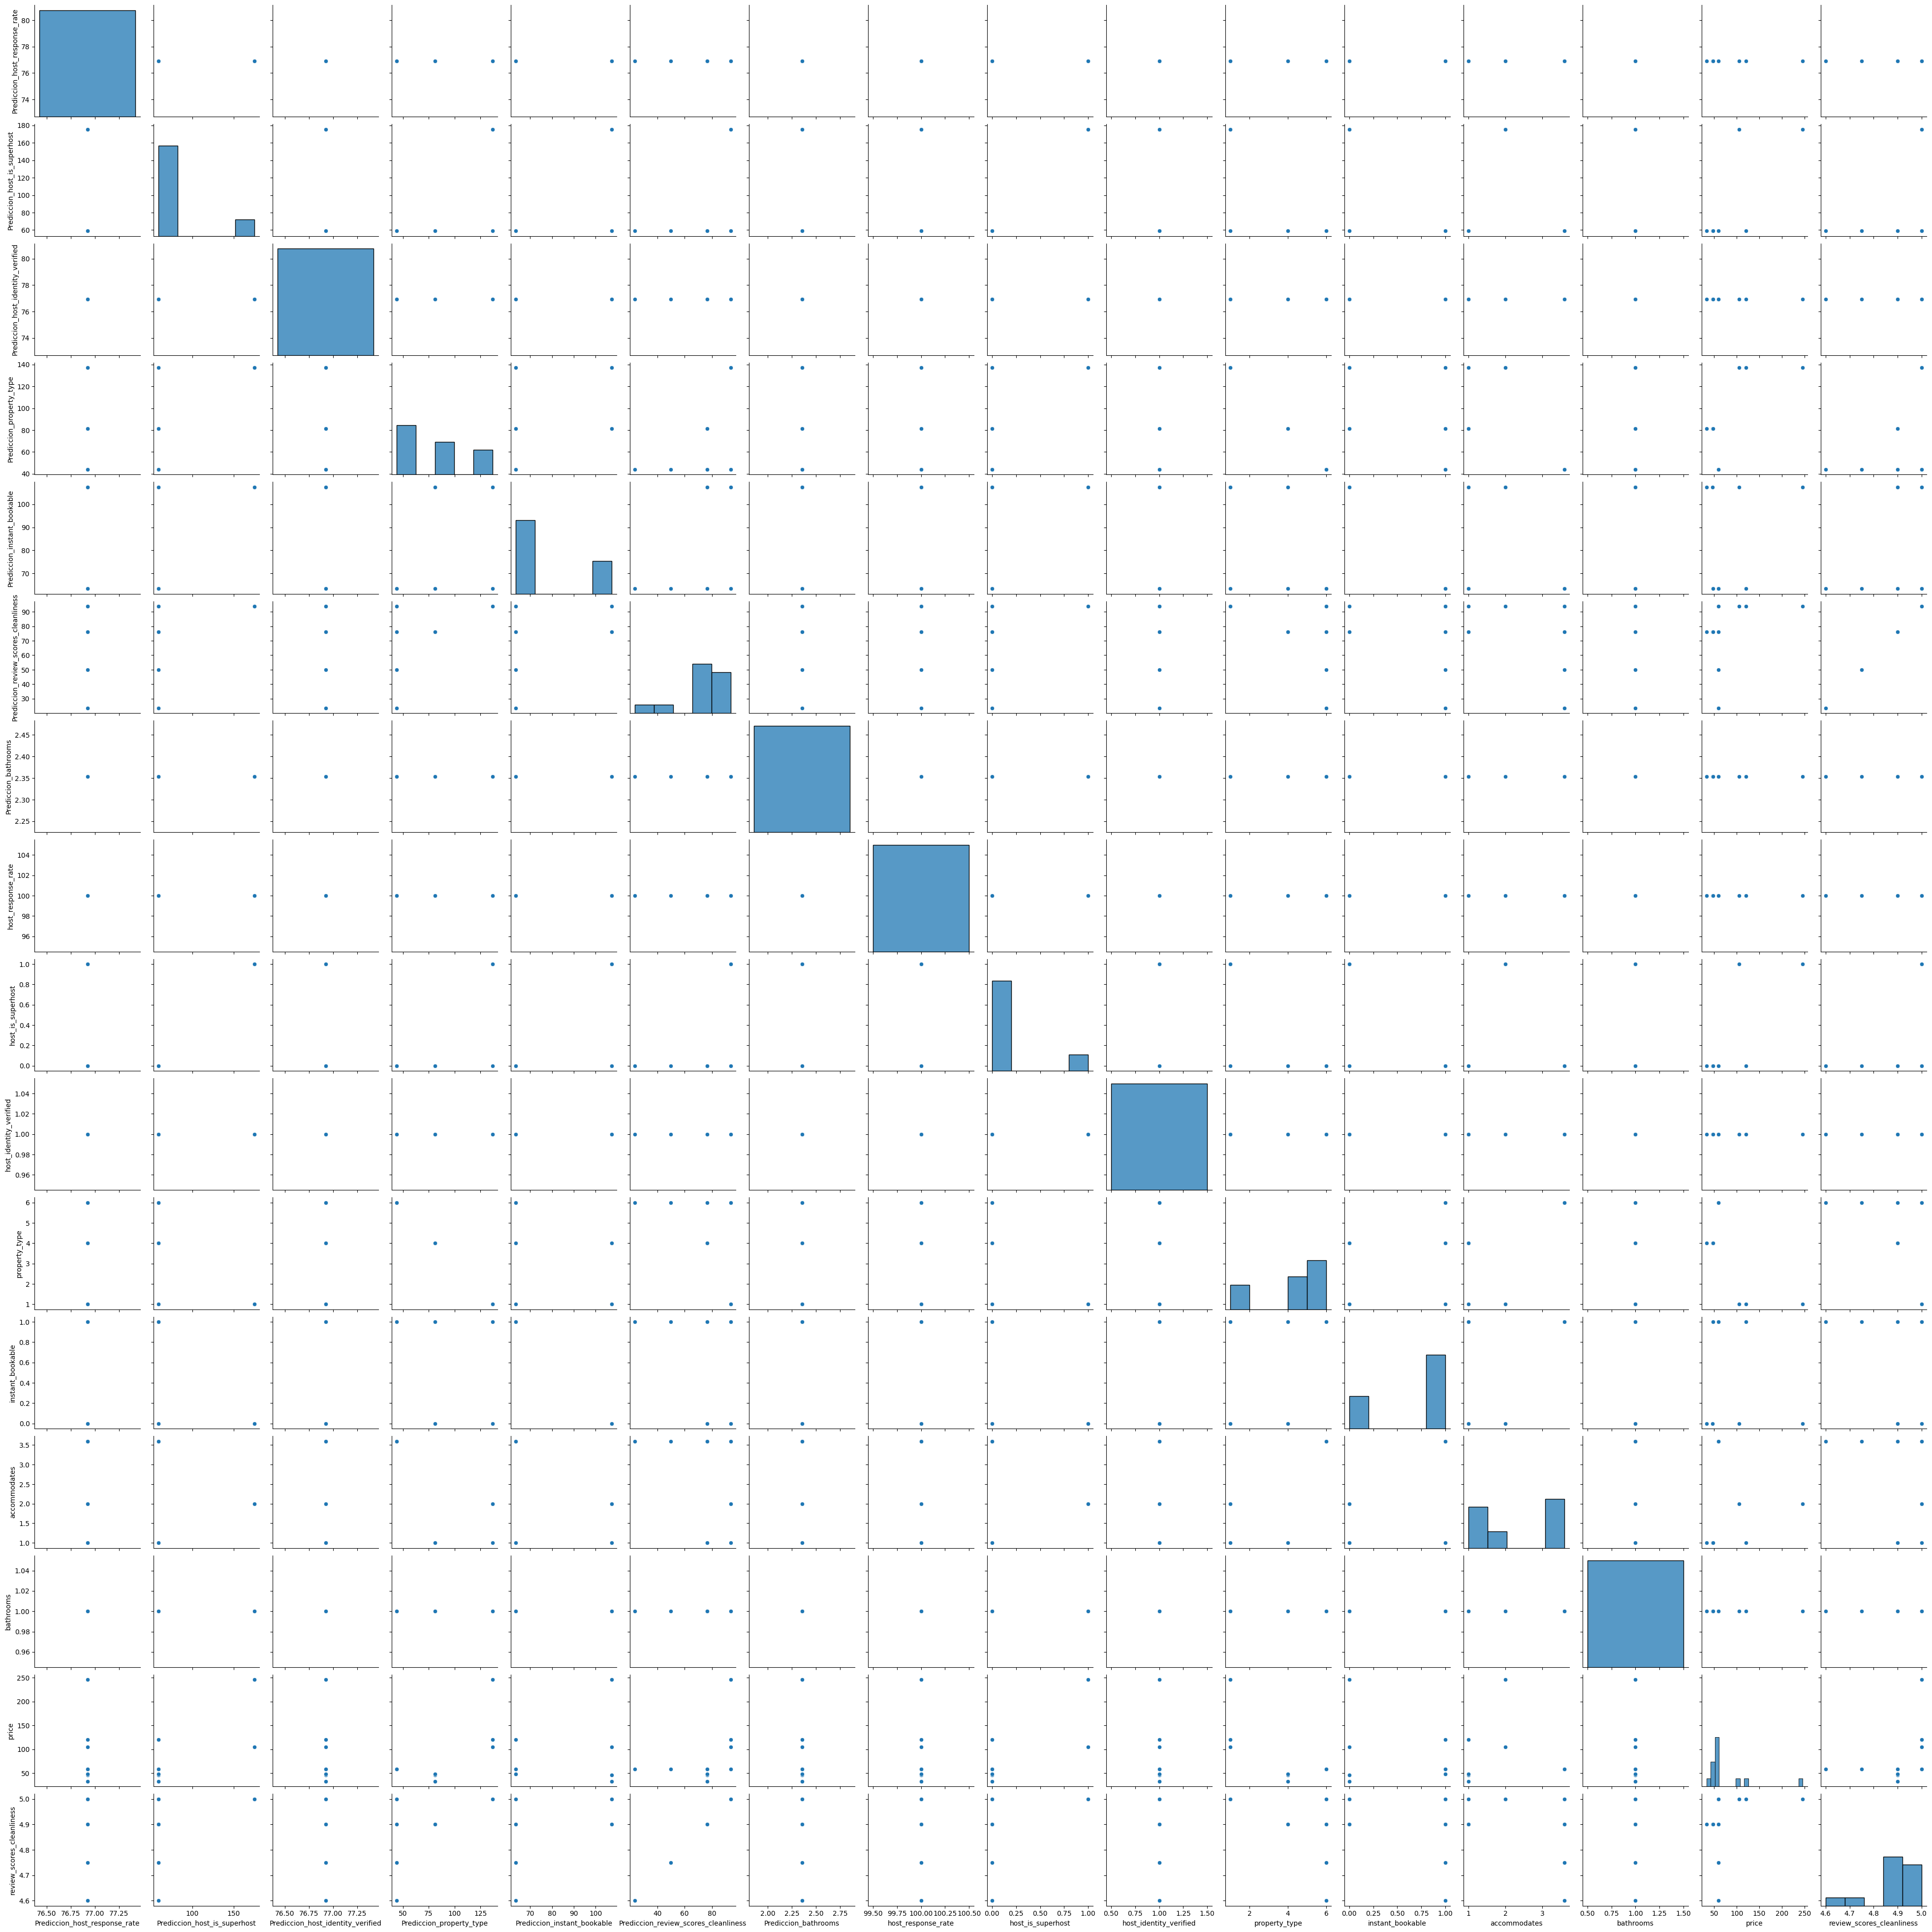

In [144]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

In [145]:
#Analizar categorias de una columna
df6 = f2.groupby(['host_response_rate'])['host_response_rate'].count()
df6

host_response_rate
100.0    13
Name: host_response_rate, dtype: int64

In [146]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prediccion_host_is_superhost,NaN,1.000000,NaN,0.700292,0.639602,0.366934,NaN,NaN,1.000000,NaN,-0.700292,-0.639602,-0.125692,NaN,0.780364,0.366934
Prediccion_host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prediccion_property_type,NaN,0.700292,NaN,1.000000,0.586546,0.493976,NaN,NaN,0.700292,NaN,-1.000000,-0.586546,-0.688590,NaN,0.679334,0.493976
Prediccion_instant_bookable,NaN,0.639602,NaN,0.586546,1.000000,0.275371,NaN,NaN,0.639602,NaN,-0.586546,-1.000000,-0.474203,NaN,0.378448,0.275371
Prediccion_review_scores_cleanliness,NaN,0.366934,NaN,0.493976,0.275371,1.000000,NaN,NaN,0.366934,NaN,-0.493976,-0.275371,-0.296897,NaN,0.364306,1.000000
Prediccion_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,NaN,1.000000,NaN,0.700292,0.639602,0.366934,NaN,NaN,1.000000,NaN,-0.700292,-0.639602,-0.125692,NaN,0.780364,0.366934
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prediccion_host_is_superhost,NaN,1.000000,NaN,0.700292,0.639602,0.366934,NaN,NaN,1.000000,NaN,0.700292,0.639602,0.125692,NaN,0.780364,0.366934
Prediccion_host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prediccion_property_type,NaN,0.700292,NaN,1.000000,0.586546,0.493976,NaN,NaN,0.700292,NaN,1.000000,0.586546,0.688590,NaN,0.679334,0.493976
Prediccion_instant_bookable,NaN,0.639602,NaN,0.586546,1.000000,0.275371,NaN,NaN,0.639602,NaN,0.586546,1.000000,0.474203,NaN,0.378448,0.275371
Prediccion_review_scores_cleanliness,NaN,0.366934,NaN,0.493976,0.275371,1.000000,NaN,NaN,0.366934,NaN,0.493976,0.275371,0.296897,NaN,0.364306,1.000000
Prediccion_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,NaN,1.000000,NaN,0.700292,0.639602,0.366934,NaN,NaN,1.000000,NaN,0.700292,0.639602,0.125692,NaN,0.780364,0.366934
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

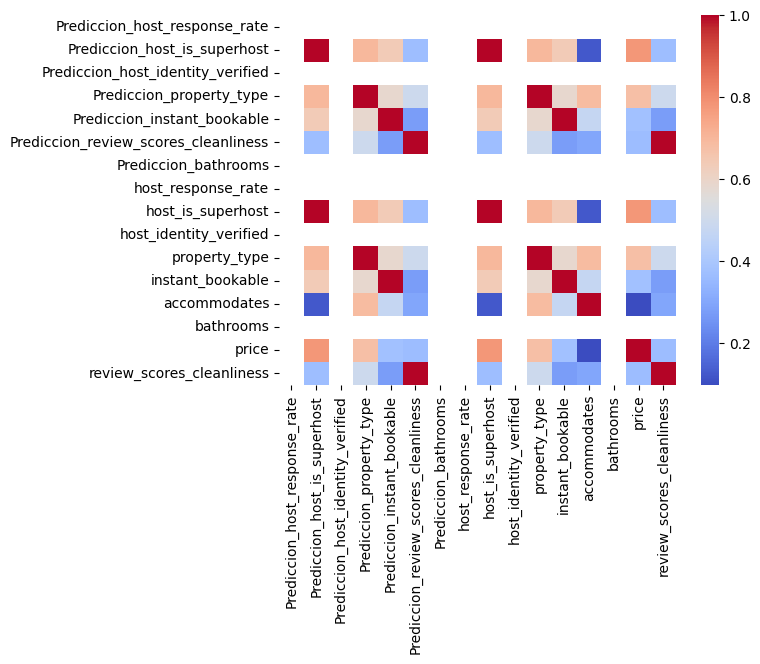

In [148]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

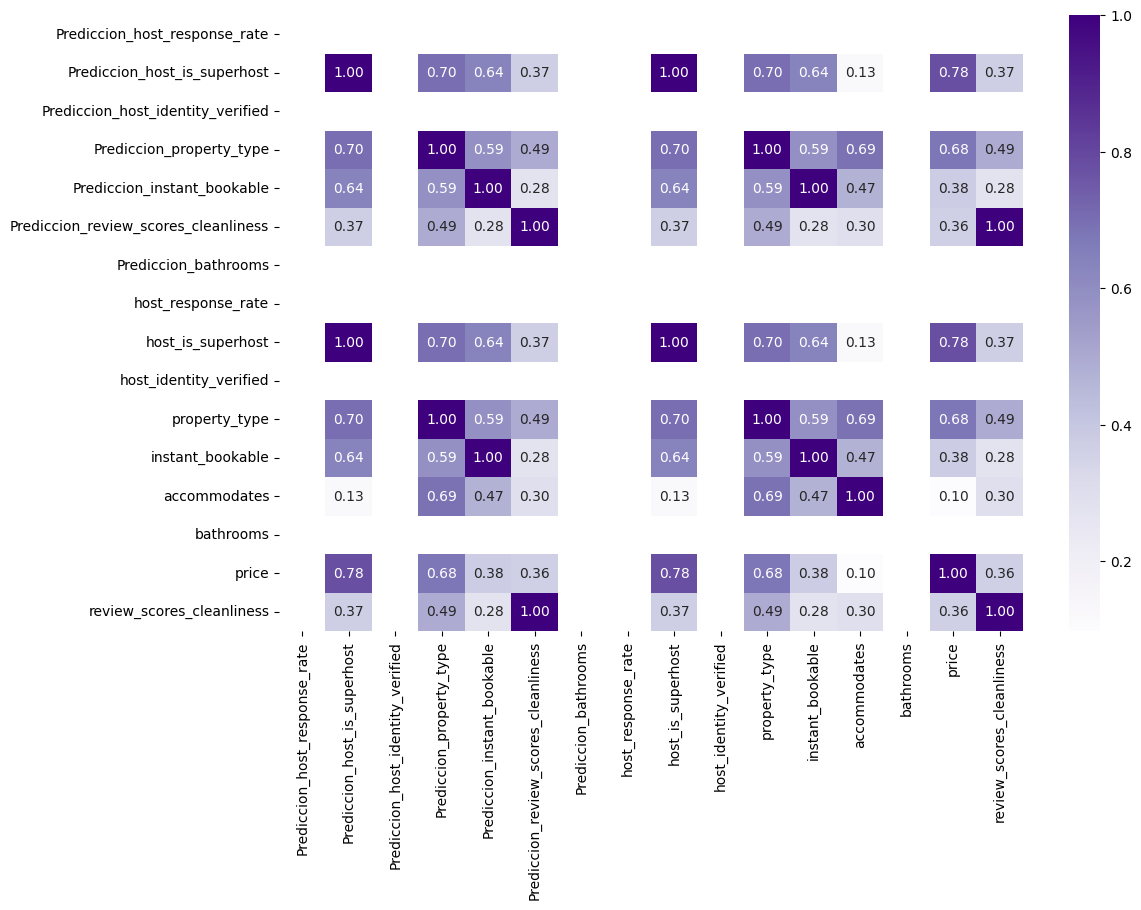

In [149]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

In [150]:
# Obtener R² de cada modelo
r2_1 = model.score(Var_Indep, Var_Dep)
r2_2 = model2.score(Var_Indep2, Var_Dep)
r2_3 = model3.score(Var_Indep3, Var_Dep)
r2_4 = model4.score(Var_Indep4, Var_Dep)
r2_5 = model5.score(Var_Indep5, Var_Dep)
r2_6 = model6.score(Var_Indep6, Var_Dep)
r2_7 = model7.score(Var_Indep7, Var_Dep)
r2_8 = model8.score(Var_Indep8, Var_Dep2)

# Guardar los resultados en un diccionario
r2_values = {
    "host_response_rate": r2_1,
    "host_is_superhost": r2_2,
    "room_type": r2_3,
    "host_identity_verified": r2_4,
    "property_type": r2_5,
    "instant_bookable": r2_6,
    "review_scores_cleanliness": r2_7,
    "bathrooms": r2_8
}

# Ordenar y mostrar las 3 mejores variables
top_3 = sorted(r2_values.items(), key=lambda x: x[1], reverse=True)[:3]
print("Las 3 variables con mayor correlación son:")
for variable, r2 in top_3:
    print(f"{variable}: R² = {r2:.4f}")

Las 3 variables con mayor correlación son:
host_is_superhost: R² = 0.6090
property_type: R² = 0.4615
instant_bookable: R² = 0.1432
